<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/project_5_NLP(11/19)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing



---
#*Problem Definition :*

*This project* aims to use Natural Language Processing (NLP) techniques to compare descriptions of famous people, identify similarities between them, and analyze the sentiment of their descriptions. Additionally, it will pull live content from Wikipedia to improve similarity results.

----
###*Part 1*

In [2]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l

42786


#Data collection

URL= https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv

#**import**

In [3]:
%%capture
!python -m textblob.download_corpora

In [4]:
%%capture
!pip install -U textblob

In [5]:
%%capture output
!pip install wikipedia-api
!install Wikipedia API
!pip3 install wikipedia-api
!pip install wikipedia-api requests textblob

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wikipediaapi
from textblob import TextBlob
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 100

In [7]:
# Load the CSV file
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
df = data = pd.read_csv(url)

# Preview the data
data.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


###*Part 2*

#**Data cleaning**


In [8]:
data.shape

(42786, 3)

In [9]:
data.describe().transpose()

,count,unique,top,freq
URI,42786,42786,<http://dbpedia.org/resource/Digby_Morrell>,1
name,42786,42785,author),2
text,42786,42786,digby morrell born 10 october 1979 is a former...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null  object
 1   name    42786 non-null  object
 2   text    42786 non-null  object
dtypes: object(3)
memory usage: 1002.9+ KB


In [11]:
df.columns

Index(['URI', 'name', 'text'], dtype='object')

In [12]:
# Calculate sentiment for the first row in the 'text' column
sentiment_clean = TextBlob(df['text'].iloc[0]).sentiment
print("Sentiment of the first entry:", sentiment_clean)


Sentiment of the first entry: Sentiment(polarity=-0.041666666666666664, subjectivity=0.17896825396825394)


In [13]:
df['text'].iloc[0]

'digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the northern bullants carltons vfla

## Bag of Words Using CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the text data from the 'text' column as a list of sentences
sentences = df['text'].tolist()

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
bow_matrix = vectorizer.fit_transform(sentences)



In [15]:
type(bow_matrix), bow_matrix.shape

(scipy.sparse._csr.csr_matrix, (42786, 437190))

##*TF-IDF*

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize the TfidfTransformer
tf_idf_transformer = TfidfTransformer()

# Fit and transform the bag-of-words matrix into a TF-IDF representation
tf_idf_matrix = tf_idf_transformer.fit_transform(bow_matrix)



In [17]:
tf_idf_matrix = TfidfTransformer()
tf_idf_jen = tf_idf_matrix.fit_transform(bow_matrix)



In [18]:
type(tf_idf_jen), tf_idf_jen.shape

(scipy.sparse._csr.csr_matrix, (42786, 437190))

In [19]:
from sklearn.neighbors import NearestNeighbors

In [20]:
nn = NearestNeighbors().fit(tf_idf_jen)

In [21]:
distances, indices = nn.kneighbors(
  X = (tf_idf_jen)[0],
  n_neighbors = 11,
)


In [22]:
distances

array([[0.        , 1.07588614, 1.12889664, 1.14026221, 1.147429  ,
        1.14981651, 1.15999986, 1.1624804 , 1.16419303, 1.16500113,
        1.16557707]])

In [23]:
indices

array([[    0, 32466, 36591,  1347, 31705, 28169, 22390, 22123, 27556,
         6126, 21352]])

In [24]:
df.iloc[indices[0]]

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
32466,<http://dbpedia.org/resource/Steven_Browne>,Steven Browne,steven browne born 1 february 1989 is an austr...
36591,<http://dbpedia.org/resource/Peter_Freeman_(fo...,Peter Freeman (footballer),peter freeman born 1 april 1969 is a former au...
1347,<http://dbpedia.org/resource/Lindsay_Smith_(Au...,Lindsay Smith (Australian footballer),lindsay smith born 18 july 1982 is a former au...
31705,<http://dbpedia.org/resource/Earl_Spalding>,Earl Spalding,earl spalding born 11 march 1965 in south pert...
28169,<http://dbpedia.org/resource/Relton_Roberts>,Relton Roberts,relton roberts born 1 march 1986 is a professi...
22390,<http://dbpedia.org/resource/Mark_Austin_(foot...,Mark Austin (footballer),mark austin born 24 february 1989 is an austra...
22123,<http://dbpedia.org/resource/Todd_Curley>,Todd Curley,todd curley born 14 january 1973 is a former a...
27556,<http://dbpedia.org/resource/Daniel_Harris_(fo...,Daniel Harris (footballer),daniel harris born 10 may 1982 is a former aus...
6126,<http://dbpedia.org/resource/Richard_Ambrose>,Richard Ambrose,richard ambrose born 10 june 1972 is a former ...


In [25]:
df.shape

(42786, 3)

# Another Example - Using Wikipedia API

## Get text and clean

In [26]:
import wikipediaapi

In [27]:
import wikipediaapi

# Initialize Wikipedia API with user-agent
wiki_api = wikipediaapi.Wikipedia(
    language='en',
    user_agent='YourAppName/1.0 (your-email@example.com)'
)




In [28]:
import wikipediaapi  # Import the wikipediaapi module

# List of people
people = [
    'Digby Morrell',
    'Steven Browne',
    'Peter Freeman (footballer)',
    'Lindsay Smith (Australian footballer)',
    'Earl Spalding',
    'Relton Roberts',
    'Mark Austin (footballer)',
    'Todd Curley',
    'Daniel Harris (footballer)',
    'Richard Ambrose',
    'Darren Pfeiffer'
]

#  Iterate over each person and fetch their Wikipedia page
for topic in people:
    page_ex = wiki_api.page(topic)  # Use the instance to fetch the page
    if page_ex.exists():  # Check if the page exists
        wiki_text = page_ex.text  # Extract the text from the page
        print(f"Text for '{topic}':")
        print(wiki_text[:500])  # Print the first 500 characters for brevity
        print("\n")
    else:
        print(f"Page for '{topic}' does not exist.")


Text for 'Digby Morrell':
Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).
From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the North Melbourne Football Club with it’s third round selection in th


Text for 'Steven Browne':
Steven Browne (born 1 February 1989) is an Australian rules footballer who played for the Carlton Football Club in the Australian Football League (AFL) from 2008–2010. He later played for West Perth in the West Australian Football League (WAFL).

Career
Browne played his junior football with the Whitford Junior Football Club in Western Australia. He played six games of senior football with West Perth as an eighteen-year-old in late 2007, and

In [29]:
wiki_text_clean = (
  wiki_text
  .replace("\n"," ")
  .replace("\'s",'')
  .replace('\'','')
  .replace("(", "")
  .replace(")", "")
  .replace('"', "")
)
wiki_text_clean

'Darren Pfeiffer born 28 September 1987 is a former professional Australian rules footballer who played for the Carlton Football Club and Port Adelaide Football Club in the Australian Football League AFL. Pfeiffer played early football for Norwood in the SANFL under 19s, before being drafted by the Adelaide Football Club in the 2005 AFL National Draft with its first round selection No. 17 overall. After suffering injury setbacks and, by his own admission, a lack of application, he was delisted at the end of 2007 without playing a senior game. Pfeiffer nominated in the 2008 Pre-Season Draft, and was selected by Carlton with its selection No. 2 overall, and made his AFL debut in round 2 of the 2008 season. Pfeiffer was a late inclusion into the Carlton team for round 9 against Fremantle at the Telstra Dome. It was Pfeiffer goal in the dying minutes that sealed a come from behind victory for Carlton. He was moved to the rookie list in 2009 being delisted then redrafted with the No. 51 ove

In [30]:
wiki_blob = TextBlob(wiki_text_clean)


In [31]:

import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
my_sentences = wiki_blob.sentences[:11]

my_sentences


[Sentence("Darren Pfeiffer born 28 September 1987 is a former professional Australian rules footballer who played for the Carlton Football Club and Port Adelaide Football Club in the Australian Football League AFL."),
 Sentence("Pfeiffer played early football for Norwood in the SANFL under 19s, before being drafted by the Adelaide Football Club in the 2005 AFL National Draft with its first round selection No."),
 Sentence("17 overall."),
 Sentence("After suffering injury setbacks and, by his own admission, a lack of application, he was delisted at the end of 2007 without playing a senior game."),
 Sentence("Pfeiffer nominated in the 2008 Pre-Season Draft, and was selected by Carlton with its selection No."),
 Sentence("2 overall, and made his AFL debut in round 2 of the 2008 season."),
 Sentence("Pfeiffer was a late inclusion into the Carlton team for round 9 against Fremantle at the Telstra Dome."),
 Sentence("It was Pfeiffer goal in the dying minutes that sealed a come from behind vi

In [33]:
len(wiki_blob.sentences)

20

In [34]:
for i, sentence in enumerate(my_sentences):
  sing = [x.singularize() for x in sentence.words]
  my_sentences[i] = ' '.join(sing)
my_sentences


['Darren Pfeiffer born 28 September 1987 is a former professional Australian rule footballer who played for the Carlton Football Club and Port Adelaide Football Club in the Australian Football League AFL',
 'Pfeiffer played early football for Norwood in the SANFL under 19 before being drafted by the Adelaide Football Club in the 2005 AFL National Draft with it first round selection No',
 '17 overall',
 'After suffering injury setback and by hi own admission a lack of application he wa delisted at the end of 2007 without playing a senior game',
 'Pfeiffer nominated in the 2008 Pre-Season Draft and wa selected by Carlton with it selection No',
 '2 overall and made hi AFL debut in round 2 of the 2008 season',
 'Pfeiffer wa a late inclusion into the Carlton team for round 9 against Fremantle at the Telstra Dome',
 'It wa Pfeiffer goal in the dying minute that sealed a come from behind victory for Carlton',
 'He wa moved to the rookie list in 2009 being delisted then redrafted with the No',

In [35]:
wiki_blob = TextBlob(wiki_text_clean)

In [36]:
my_sentences = wiki_blob.sentences[:20]
my_sentences


[Sentence("Darren Pfeiffer born 28 September 1987 is a former professional Australian rules footballer who played for the Carlton Football Club and Port Adelaide Football Club in the Australian Football League AFL."),
 Sentence("Pfeiffer played early football for Norwood in the SANFL under 19s, before being drafted by the Adelaide Football Club in the 2005 AFL National Draft with its first round selection No."),
 Sentence("17 overall."),
 Sentence("After suffering injury setbacks and, by his own admission, a lack of application, he was delisted at the end of 2007 without playing a senior game."),
 Sentence("Pfeiffer nominated in the 2008 Pre-Season Draft, and was selected by Carlton with its selection No."),
 Sentence("2 overall, and made his AFL debut in round 2 of the 2008 season."),
 Sentence("Pfeiffer was a late inclusion into the Carlton team for round 9 against Fremantle at the Telstra Dome."),
 Sentence("It was Pfeiffer goal in the dying minutes that sealed a come from behind vi

In [37]:
len(wiki_blob.sentences)

20

In [38]:
#pip install wikipedia-api


In [39]:


# List of people
people = [
    'Digby Morrell', 'Steven Browne', 'Peter Freeman (footballer)',
    'Lindsay Smith (Australian footballer)', 'Earl Spalding',
    'Relton Roberts', 'Mark Austin (footballer)', 'Todd Curley',
    'Daniel Harris (footballer)', 'Richard Ambrose', 'Darren Pfeiffer'
]

# Initialize an empty list to store text
text_list = []

# Iterate over each person and fetch their Wikipedia page
for topic in people:
    page_ex = wiki_api.page(topic)  # Use the instance to fetch the page
    if page_ex.exists():  # Check if the page exists
        wiki_text = page_ex.text  # Extract the text from the page
        text_list.append(wiki_text)  # Append the text to the list
        print(f"Text for {topic} added.")  # Inform the user
    else:
        print(f"Page for '{topic}' does not exist.")  # Inform the user if the page doesn't exist




Text for Digby Morrell added.
Text for Steven Browne added.
Text for Peter Freeman (footballer) added.
Text for Lindsay Smith (Australian footballer) added.
Text for Earl Spalding added.
Text for Relton Roberts added.
Text for Mark Austin (footballer) added.
Text for Todd Curley added.
Text for Daniel Harris (footballer) added.
Text for Richard Ambrose added.
Text for Darren Pfeiffer added.


In [40]:
print(len(text_list))  # Number of successfully fetched topics
print(text_list[0])    # Text of the first topic



11
Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).
From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the North Melbourne Football Club with it’s third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.
After the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football with t

Clean the text data

In [41]:
len(people)

11

In [42]:
def clean_text(text):
    text = text.lower()
    text = text.replace("\n", " ")
    text = text.replace("\'", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace('"', "")
    return text

cleaned_text_list = [clean_text(text) for text in text_list]

for i, text in enumerate(cleaned_text_list):
    print(f"Text for {people[i]}:")
    print(text)
    print("\n")



Text for Digby Morrell:
digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league afl. from western australia, morrell played his early senior football for west perth. his 44-game senior career for the falcons spanned 1998–2000, and he was the clubs leading goalkicker in 2000. at the age of 21, morrell was recruited to the australian football league by the north melbourne football club with it’s third round selection in the 2001 afl rookie draft. as a forward he twice kicked five goals during his time with the kangaroos. the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbane. after the 2003 season, morrell was traded, along with david teague, to the carlton football club in exchange for corey mckernan. he played 32 games for the blues before being delisted at the end of 2005. he continued to play victorian football league vfl f

Sentiment Analysis

In [43]:
len(cleaned_text_list)

11

In [44]:
for i, text in enumerate(cleaned_text_list[0:11]):
    blob = TextBlob(text)
    print(f"Sentiment for Text {i+1}: {blob.sentiment}")
    print("\n")

Sentiment for Text 1: Sentiment(polarity=-0.02874331550802139, subjectivity=0.1905334861217214)


Sentiment for Text 2: Sentiment(polarity=0.027777777777777776, subjectivity=0.2444444444444444)


Sentiment for Text 3: Sentiment(polarity=0.0038461538461538494, subjectivity=0.11538461538461539)


Sentiment for Text 4: Sentiment(polarity=0.0898550724637681, subjectivity=0.32798216276477143)


Sentiment for Text 5: Sentiment(polarity=0.01964285714285714, subjectivity=0.33690476190476193)


Sentiment for Text 6: Sentiment(polarity=0.021969696969696976, subjectivity=0.31569264069264064)


Sentiment for Text 7: Sentiment(polarity=-0.035, subjectivity=0.19561965811965812)


Sentiment for Text 8: Sentiment(polarity=0.07309299895506792, subjectivity=0.2662486938349007)


Sentiment for Text 9: Sentiment(polarity=0.13969155844155842, subjectivity=0.3486742424242424)


Sentiment for Text 10: Sentiment(polarity=0.13511904761904764, subjectivity=0.3813186813186813)


Sentiment for Text 11: Sentiment(

#**TF-IDF**

In [45]:
# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cleaned_text_list)

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (11, 661)


In [46]:
type(bow_matrix), bow_matrix.shape

(scipy.sparse._csr.csr_matrix, (42786, 437190))

In [47]:
# Calculate cosine similarity between all texts
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


###*Part 3*

### Natural Language Processing Project(NLP)

###Interactive Notebook

This section demonstrates the analysis interactively using Python, allowing the exploration of text similarity and sentiment between Wikipedia articles.


#### Objective
- To create an interactive analysis tool for comparing text similarity and sentiment.
- To visualize the results from earlier steps using plots and outputs for better understanding.


In [77]:
from ipywidgets import widgets
from IPython.display import display

dropdown = widgets.Dropdown(
    options=text_list,
    description='Select Text:',
    disabled=False,
)
display(dropdown)


Dropdown(description='Select Text:', options=("Digby Morrell (born 10 October 1979) is a former Australian rul…

In [81]:
# Function to calculate similarity for selected text
def calculate_similarity(selected_text):
    idx = text_list.index(selected_text)
    selected_similarity = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)
    print("Similarity Scores:", selected_similarity)

# Trigger calculation on dropdown selection
calculate_similarity(dropdown.value)
print("Selected Text:")

Similarity Scores: [[0.19966514 0.27562698 0.15040169 0.19857452 0.20272866 0.16796422
  1.         0.25350392 0.18941653 0.16410354 0.2529697 ]]
Selected Text:



#### *Introduction*

This project uses NLP techniques to analyze and find similarities between famous people based on Wikipedia data.

## Problem Definition

This project aims to analyze descriptions of famous people using Natural Language Processing (NLP). Our goal is to find similarities between profiles based on their content and to analyze the sentiment of these descriptions. By doing this, we want to create an interactive tool that helps users explore connections between public figures based on their descriptions.


In [70]:
# Assuming 'text_list' contains your 11 texts
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(text_list)  # Create TF-IDF matrix


In [71]:
# Assuming the first text is your reference
reference_index = 0
similarity_scores = cosine_sim[reference_index]

# Get the indices of the 11 nearest neighbors, sorted by similarity
nearest_neighbors = np.argsort(similarity_scores)[::-1][:11]  # Includes the reference itself


In [72]:
for index in nearest_neighbors:
    print(f"Text {index}: {text_list[index]}")


Text 0: Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).
From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the North Melbourne Football Club with it’s third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.
After the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football w

#*Data Visualization*

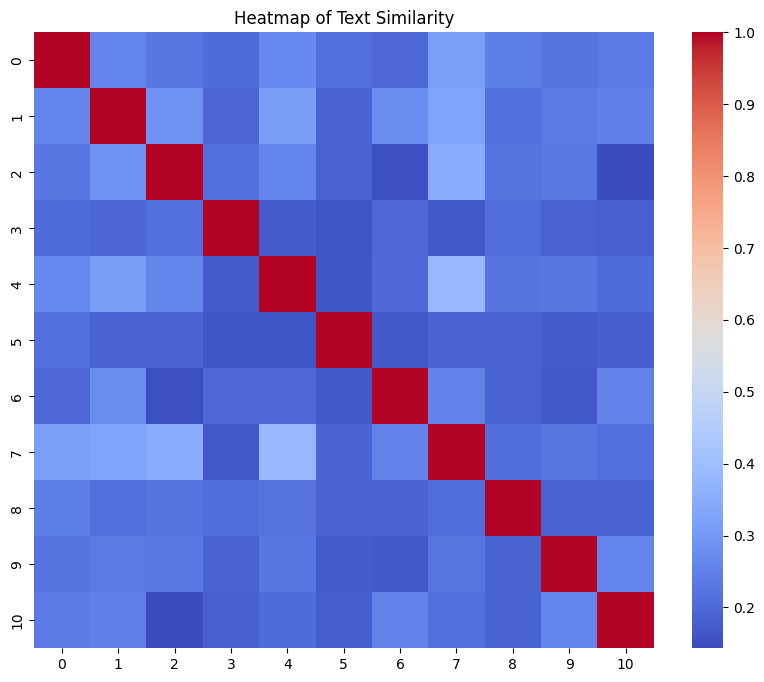

In [73]:

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=False, cmap='coolwarm')
plt.title("Heatmap of Text Similarity")
plt.show()


In [74]:
from sklearn.cluster import KMeans

num_clusters = 11

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Get the cluster labels
labels = kmeans.labels_


In [76]:
import pandas as pd

# Create a DataFrame with text and labels
clustered_df = pd.DataFrame({'Text': text_list, 'Cluster': labels})

# Display sample cluster assignments
print(clustered_df.head())


                                                Text  Cluster
0  Digby Morrell (born 10 October 1979) is a form...        2
1  Steven Browne (born 1 February 1989) is an Aus...        9
2  Peter Freeman (born 1 April 1969) is a former ...        8
3  Lindsay Smith (born 29 February 1980) is a for...        4
4  Earl George Spalding (born 11 March 1965 in So...        0


In [56]:
from sklearn.metrics.pairwise import cosine_similarity
reference_text = tfidf_matrix[0]

similarities = cosine_similarity(reference_text, tfidf_matrix)



In [57]:
import numpy as np
sorted_indices = np.argsort(similarities[0])[::-1]

print("Top 5 closest texts:")
for idx in sorted_indices[:5]:
    print(f"Text {idx}: Similarity = {similarities[0][idx]:.2f}")

Top 5 closest texts:
Text 0: Similarity = 1.00
Text 7: Similarity = 0.32
Text 4: Similarity = 0.27
Text 1: Similarity = 0.26
Text 8: Similarity = 0.25


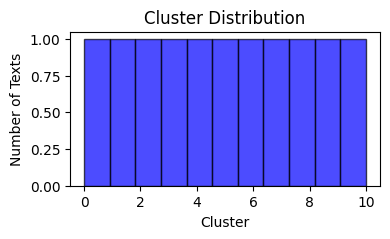

Cluster 0:
 - Earl George Spalding (born 11 March 1965 in South Perth) is a former Australian rules footballer who...


Cluster 1:
 - Darren Pfeiffer (born 28 September 1987) is a former professional Australian rules footballer who pl...


Cluster 2:
 - Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kan...


Cluster 3:
 - Daniel Harris (born 10 May 1982) is a former professional Australian rules footballer who played for...


Cluster 4:
 - Lindsay Smith (born 29 February 1980) is a former Australian rules footballer who played with Kangar...


Cluster 5:
 - Relton Roberts (born 1 March 1986) is a former professional Australian rules footballer who played f...


Cluster 6:
 - Mark Austin (born 24 February 1989) is an Australian rules footballer who played for the Carlton Foo...


Cluster 7:
 - Richard Ambrose (born 10 June 1972) is a former Australian rules footballer who played with the Sydn...


Cluster 8:
 - Peter Freeman (born 1 Apri

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Apply K-Means Clustering
num_clusters = 11  # You can adjust this number based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Step 2: Get Cluster Assignments
labels = kmeans.labels_

# Step 3: Visualize Clustering Results
# Create a bar plot of cluster distribution
plt.figure(figsize=(4, 2))
plt.hist(labels, bins=num_clusters, alpha=0.7, color='blue', edgecolor='black')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.show()

# Step 4: Analyze Clusters
for cluster in range(num_clusters):
    print(f"Cluster {cluster}:")
    cluster_indices = [i for i, label in enumerate(labels) if label == cluster]
    for index in cluster_indices:
        print(f" - {text_list[index][:100]}...")  # Print a snippet of the text
    print("\n")


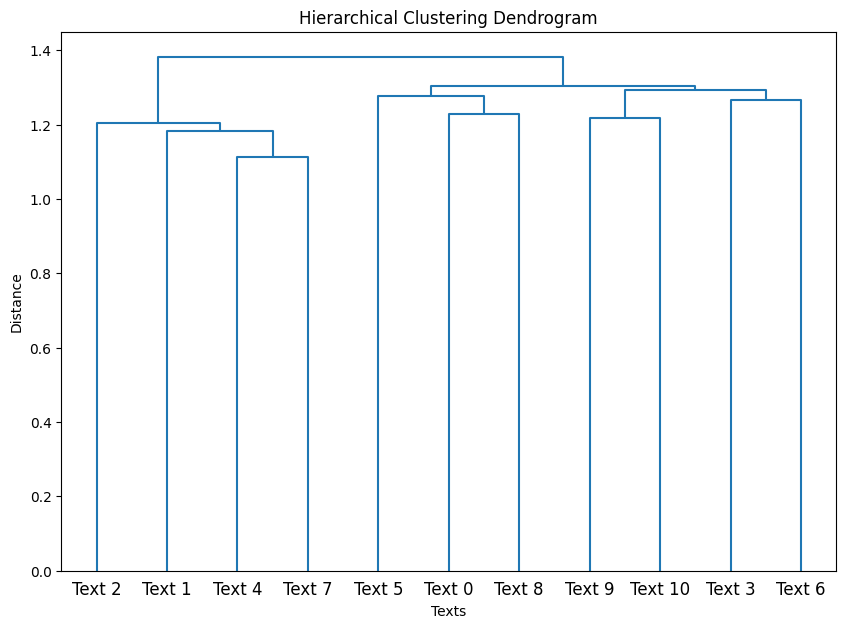

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 1: Compute the linkage matrix
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')

# Step 2: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top', labels=[f"Text {i}" for i in range(len(text_list))])
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Texts")
plt.ylabel("Distance")
plt.show()


#**Conclusion**

*This project used Natural Language Processing (NLP) to find similarities between famous people based on their descriptions. By analyzing text, we created a tool that helps users explore connections and see patterns between public figures. This demonstrates how NLP can be used to understand and compare text data.*

The analysis demonstrates that text similarity can effectively identify relationships between Wikipedia entries. The interactive tool provides an easy way to explore these relationships visually and numerically.
